<a href="https://colab.research.google.com/github/liorhirsch/Kaggle-Landmark-ML-Challange/blob/master/DenseNet_Sanduri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DenseNet :  ***סוג אלגוריתם*** 

imagenet : ***משקל***

***כמות תמונות אימון*** : 67559 

***כמות תמונות ולידציה*** : 7458 

***גודל תמונה*** : 224*224

60 : ***גודל batch***
 
1125 : ***גודל step/iteration***

5 : ***גודל epoch ***
 
 ***מבנה*** : 3 שכבות קונבולוציה עם רליו, 1 סופטמקס

In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen=ImageDataGenerator(
                               rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.8, 1.25],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',
                               data_format='channels_last',
                               brightness_range=[0.5, 1.5]) #included in our dependencies

validation_datagen = ImageDataGenerator(
                               rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.8, 1.25],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',
                               data_format='channels_last',
                               brightness_range=[0.5, 1.5]) #included in our dependencies

In [0]:
image_size = (224,224)
batch_size = 60

training_data_dir = r'drive/My Drive/photos'
validation_data_dir = r'drive/My Drive/validation'

train_generator=train_datagen.flow_from_directory(training_data_dir,
                                                 target_size=image_size,
                                                 color_mode='rgb',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
                                        validation_data_dir,
                                         target_size=image_size,
                                         color_mode='rgb',
                                        class_mode = "categorical")

Found 67559 images belonging to 100 classes.
Found 7458 images belonging to 100 classes.


In [0]:
x_batch, y_batch = next(train_generator)

In [0]:
import numpy as np

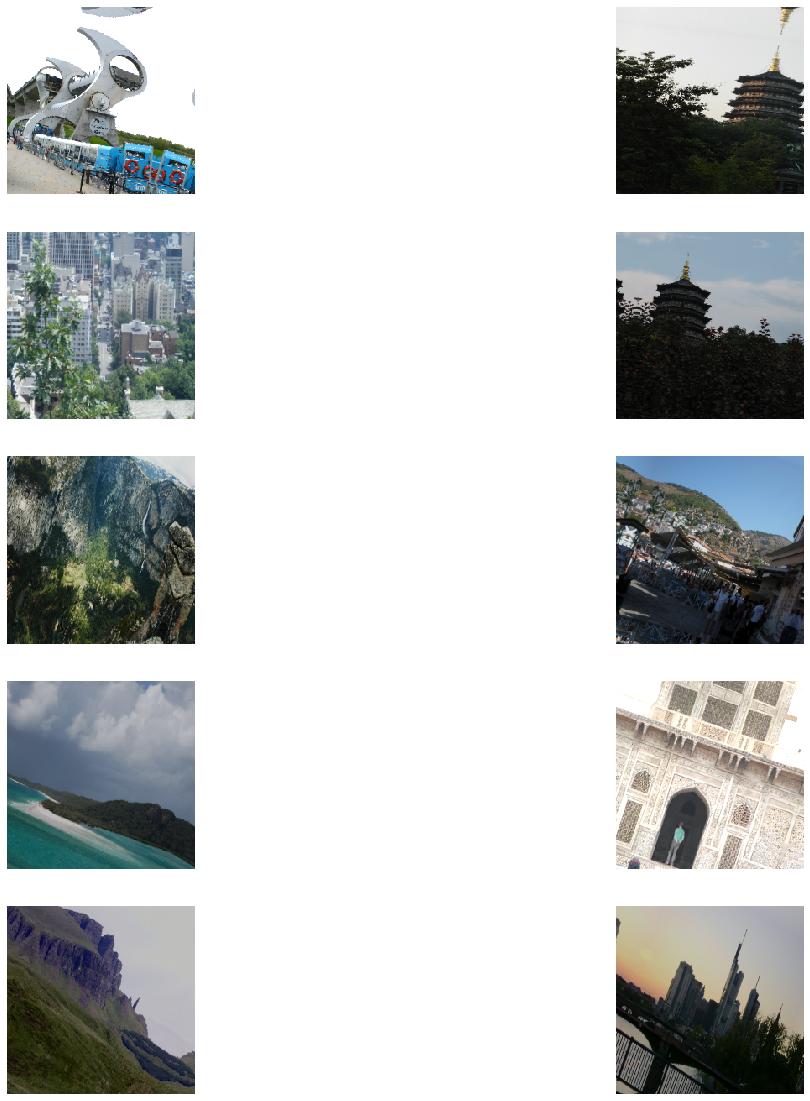

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = x_batch[i]
    image= image.astype(np.uint8)
    plt.imshow(image)

**Transfer learning**

In [0]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback

In [0]:
base_model = applications.densenet.DenseNet121(include_top=False, weights='imagenet', input_tensor=None, input_shape=(image_size[0], image_size[1], 3), pooling=None, classes=100)


#base_model = applications.mobilenet.MobileNet(input_shape = (image_size[0], image_size[1], 3), alpha=1.0,depth_multiplier=1, dropout=1e-3,  include_top=False, weights='imagenet', input_tensor=None, pooling=None, classes=100)
# alpha - controls the width of the network.
#If alpha < 1.0, proportionally decreases the number of filters in each layer.
#If alpha > 1.0, proportionally increases the number of filters in each layer.
#If alpha = 1, default number of filters from the paper are used at each layer.

# depth_multiplier: depth multiplier for depthwise convolution
# dropout: dropout rate - קצב נשירה של הנתונים
#include_top: whether to include the fully-connected layer at the top of the network.
#input_tensor: optional Keras tensor (i.e. output of  layers.Input()) to use as image input for the model.
#pooling: Optional pooling mode for feature extraction when include_top is False.

29089792/29084464 [==============================] - 3s 0us/step


In [0]:
base_model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [0]:
for layer in base_model.layers[:121]:
    print(layer.name)

input_1
zero_padding2d
conv1/conv
conv1/bn
conv1/relu
zero_padding2d_1
pool1
conv2_block1_0_bn
conv2_block1_0_relu
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_concat
conv2_block2_0_bn
conv2_block2_0_relu
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_concat
conv2_block3_0_bn
conv2_block3_0_relu
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_concat
conv2_block4_0_bn
conv2_block4_0_relu
conv2_block4_1_conv
conv2_block4_1_bn
conv2_block4_1_relu
conv2_block4_2_conv
conv2_block4_concat
conv2_block5_0_bn
conv2_block5_0_relu
conv2_block5_1_conv
conv2_block5_1_bn
conv2_block5_1_relu
conv2_block5_2_conv
conv2_block5_concat
conv2_block6_0_bn
conv2_block6_0_relu
conv2_block6_1_conv
conv2_block6_1_bn
conv2_block6_1_relu
conv2_block6_2_conv
conv2_block6_concat
pool2_bn
pool2_relu
pool2_conv
pool2_pool
conv3_block1_0_bn
conv3_block1_0_relu
conv3_block1_1_conv
conv3_b

In [0]:
for layer in base_model.layers[:121]:
    layer.trainable = False

In [0]:
classCount = 100

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(classCount,activation='softmax')(x) #final layer with softmax activation

model_final=Model(inputs=base_model.input,outputs=preds)

**Global Average Pooling**

In [0]:
# creating the final model 
model_final.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [0]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.001, momentum=0.9), metrics=["accuracy"])

In [0]:
step_size_train=train_generator.n//train_generator.batch_size
print(step_size_train)

1125


In [0]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

#https://stackoverflow.com/questions/12984426/python-pil-ioerror-image-file-truncated-with-big-images

In [0]:
import os
path_results="drive/My Drive/results/denseNet/regular/Sanduri"
if not os.path.exists(path_results):
    os.makedirs(path_results)

In [0]:
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=2, verbose=1, mode='auto')

In [0]:
import time

networkfileName = path_results + "/DenseNet_{}.h5".format(int(time.time()))
                      
checkpoint = ModelCheckpoint(networkfileName, monitor='val_acc', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)


In [0]:
history = model_final.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data = validation_generator,
                   epochs=5
                   ,callbacks = [checkpoint, early])

Epoch 1/5


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:872: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


  22/1125 [..............................] - ETA: 13:27:34 - loss: 4.6226 - acc: 0.0167

KeyboardInterrupt: ignored

In [0]:
model_final.save(path_results + "/dense_net_sanduri_model_1.h5")

In [0]:
print(history.history.keys())

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.01, momentum=0.9), metrics=["accuracy"])

history2 = model_final.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data = validation_generator,
                   epochs=4
                   ,callbacks = [checkpoint, early])

In [0]:
model_final.save(path_results + "/dense_net_sanduri_model_2.h5")

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [0]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
import pickle

with open(path_results + "/history_losses_val.pickle", "wb") as history_file:
    pickle.dump(history.history['val_loss'], history_file)
    
with open(path_results + "/history_accuracy_val.pickle", "wb") as history_file:
    pickle.dump(history.history['val_acc'], history_file)
    
with open(path_results + "/history_losses_train.pickle", "wb") as history_file:
    pickle.dump(history.history['loss'], history_file)
    
with open(path_results + "/history_accuracy_train.pickle", "wb") as history_file:
    pickle.dump(history.history['acc'], history_file)

In [0]:
#BASE_PATH="E:/Projects/ML_Project/Landmark_Kaggle_Challange"
BASE_PATH='drive/My Drive'
test_data_dir = BASE_PATH + '/test'

test_datagen=ImageDataGenerator()
test_generator=test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=image_size,
                                                  color_mode='rgb',
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

tep_size_test=test_generator.n//test_generator.batch_size

test_loss, test_acc = model_final.evaluate_generator(generator=test_generator, 
                               steps=step_size_test)


In [0]:
print(test_loss)
print(test_acc)

Create results directory if it doesn't exist

Save data via pickle:

* history_losses
* history_accuracy
* x

In [0]:
#import pickle

#history_losses_pickle_out = open(path_results + "/history_losses.pickle", "wb")
#pickle.dump(history.losses, history_losses_pickle_out)
#history_losses_pickle_out.close()

#history_accuracy_pickle_out = open(path_results + "/history_accuracy.pickle", "wb")
#pickle.dump(history.accuracy, history_accuracy_pickle_out)
#history_accuracy_pickle_out.close()

# x_pickle_out = open(path_results+ "/x.pickle", "wb")
# pickle.dump(x, x_pickle_out)
# x_pickle_out.close()